In [29]:
import numpy as np # libreria de herramientas matematicas y de álgebra lineal
import matplotlib.pyplot as plt #Librería para gráficas

# Curso Machine Learning 2020-I 
## Laboratorio 1: Regresión Lineal (máxima verosimilitud/mínimos cuadrados)

### Generación de data
El siguiente bloque define dos sistemas con ruido. En cada caso, el parámetro sigma controla el nivel ruido.

In [30]:
def sistema1(x,sigma = 2):
  a = 0.5
  b = 1
  y = a*x + b
  e = sigma*np.random.randn(y.shape[0],y.shape[1])
  t = y + e
  return t
def sistema2(x,sigma = 0.05):
  a = 0.001
  b = 1
  y = a*pow(x,3)+b
  e = sigma*np.random.randn(y.shape[0],y.shape[1])
  t = y + e
  return t
def sistema3(x,sigma=2):
  a = 0.001
  b = 0.01 
  c = 0.1
  d = 5
#  y = a*np.sin(x)/x
  y = a*x**3 + b*x**2 + c*x + d
  e = sigma*np.random.randn(y.shape[0],y.shape[1])
  t = y + e
  return t,y


El siguiente bloque define un arreglo uniformemente distribuido de valores (x) y calcula la salida del sistema uno (t) para cada valor 

(100, 1) (100, 1)
Number of samples: 100


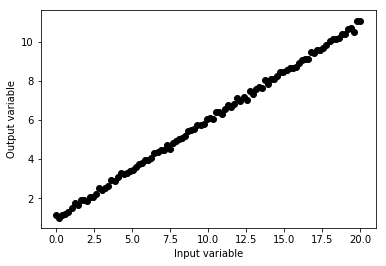

In [31]:
N = 100 # número de muestras a generar
x_init = 0
x_end = 20
x = np.linspace(x_init,x_end,N)[:,None] #datos de entrada, me genera un vector de números de tamaño de N con valores consecutivos entre x_init y x_end

t = sistema1(x,sigma=0.1)
print(x.shape,t.shape)
print('Number of samples:',t.shape[0])

plt.scatter(x, t,  color='black')
plt.xlabel('Input variable')
plt.ylabel('Output variable')
plt.show()

**A.** Use el modelo de regresión lineal descrito en clase para construir $f(x)=w_1x+w_0$. El resultado de la regresión se debe guardar en la variable $y$ para graficar. ¿Su regresion se ajusta bien a sus datos? Justifique su respuesta

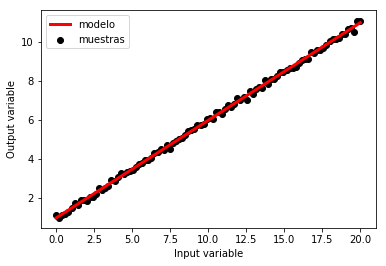

In [32]:
#%% least squares's code  for predicted y
### Define values

# using x values from before cell - Training Data

# Using t values from before cell -> Salida esperada

## Create Phi value
unos = np.ones(x.shape) #Add a variable of ones for the bias
Phi=np.concatenate((unos,x),axis=1) 
# print('Input size:',Phi.shape)


## Creating 'w' value from verosimilitud
w=np.dot(np.dot(np.linalg.inv(np.dot(Phi.T,Phi)),Phi.T), t)

## Obtaining 'y' value, salida obtenida pro el modelo de regresión (salida estimiada, aproximada)
y=np.dot(Phi,w)


#%%
# Make plot
plt.scatter(x, t,  color='black')
plt.plot(x, y, color='red', linewidth=3)
plt.xlabel('Input variable')
plt.ylabel('Output variable')
plt.legend(('modelo','muestras'))
plt.show()

**B.** Consulte cómo usar el regresor lineal implementado en scikit (LinearRegression en linear_model) y aplíquelo para el problema de regresión anterior. El resultado de la regresión se debe guardar en la variable $z$ para graficar. Compare los resultados de su implementación y del toolbox scikit. ¿Son iguales o no? ¿Por qué?

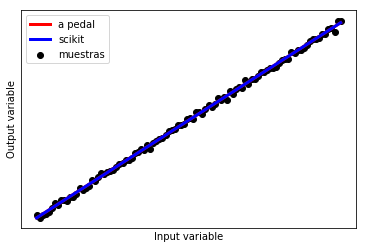

In [33]:
#%% regression with sklearn's librery 
# Import LinearRegression from scikit learn
from sklearn.linear_model import LinearRegression

# Using x values from before cell - Training Data

# Using t values from before cell -> Salida esperada

# Using Phi value from before cell

# Using w value from before cell

# Using y from before cell

## Calculate model values (z) with scikit learn

# Create linearRegression object with Training 'x' data and 't' target data
# X -> training values, t -> target values
lin_model = LinearRegression().fit(x, t)

# Create
z=lin_model.predict(x)

# Plot outputs
plt.scatter(x, t,  color='black')
plt.plot(x, y, color='red', linewidth=3)
plt.plot(x, z, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel('Input variable')
plt.ylabel('Output variable')

plt.legend(('a pedal','scikit','muestras'))
plt.show()
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

**C.** El siguiente bloque define un arreglo uniformemente distribuido de valores (x) y calcula la salida del sistema dos (t) para cada valor. ¿Considera que construir un regresor de la misma forma que para el sistema 1 ajustaría bien las muestras? ¿Por qué?

X: (200, 1) t: (200, 1)


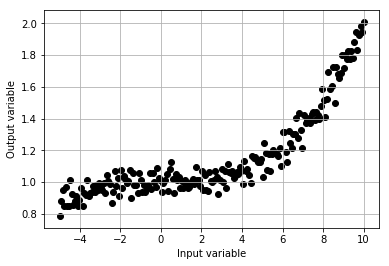

In [34]:
# Overwrite 'x' training data
x = np.linspace(-5,10,200).reshape(-1,1)

# Overwrite 't' Target data with system or model 2
t = sistema2(x)
print('X:',x.shape,'t:',t.shape)
plt.scatter(x,t,color='black')
plt.xlabel('Input variable')
plt.ylabel('Output variable')
plt.grid(True)
plt.show()

**D.** Aplique el regresor lineal de scikit para ajustar los datos del sistema dos usando como función base $\phi(x)=x$. El resultado de la regresión se debe guardar en la variable y_lineal para graficar. Compare los resultados de su implementación y del toolbox scikit. ¿Su regresion se ajusta bien a sus datos? Justifique su respuesta

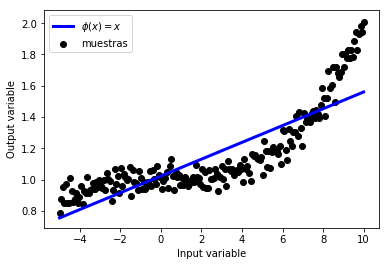

In [35]:
#%% your code

## Using 'x' training data from before cell

## Using 't' target data from before cell - system 2

# Using skit learn

# Create LinearRegression object with 'x' training data and 't' target data
# X -> training values, t -> target values
lin_model = LinearRegression().fit(x, t)

# Get y value sor "function" with scikit learn
y_lineal=lin_model.predict(x)


#%%
plt.scatter(x, t,  color='black')
plt.plot(x, y_lineal, color='blue', linewidth=3)
plt.xlabel('Input variable')
plt.ylabel('Output variable')
plt.legend(('$\phi(x)=x$','muestras'))
plt.show()

**E.** Consulte cómo usar características polinomiales como funciones base $\phi(x)=\{x^n:n=0...P\}$,$\phi(x)\in\mathbb{R}^{P+1}$ (LinearRegression en sklearn.preprocessing) y aplíquelas para el problema de regresión anterior. Las características polinomiales se deben guardar en la variabale Phi. El resultado de la regresión se debe guardar en la variable *y_poly* para graficar. ¿Mejora o no el resultado de la regresión? ¿Por qué? ¿Cómo afecta el grado del polinomio ($P$) el resultado de la regresión?

X: (200, 1) Polinomial: (200, 5)


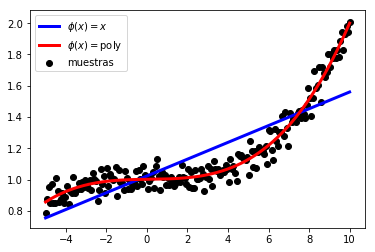

In [36]:
#%% your code
# Import scikit learn function for Polynom
from sklearn.preprocessing import PolynomialFeatures

# Get Phi for traning data with Polynomial features
Phi = PolynomialFeatures(degree=3).fit_transform(x)

# create matrix with ones, shape size of 'x' training data
unos = np.ones(x.shape) #Add a variable of ones for the bias

# Concatenate matrix of ones with Phi RBF
Phi=np.concatenate((unos, Phi), axis=1)

## Using 't' target data from before cell - system 2

# Using Phi how Training data on LinearRegression
reg= LinearRegression().fit(Phi, t)

y_poly = reg.predict(Phi)



#%%
print('X:',x.shape,'Polinomial:',Phi.shape)

plt.scatter(x, t,  color='black')
plt.plot(x, y_lineal, color='blue', linewidth=3)
plt.plot(x, y_poly, color='red', linewidth=3)
plt.legend(('$\phi(x)=x$','$\phi(x)=$poly','muestras'))
plt.show()

El siguiente bloque muestra la transformación que hacen las características polinomiales a la variable de entrada $x$.

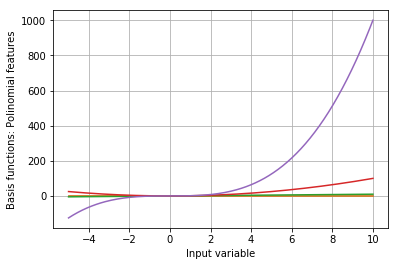

In [37]:
plt.plot(x, Phi)
plt.xlabel('Input variable')
plt.ylabel('Basis functions: Polinomial features')
plt.grid()
plt.show()

**F.** Consulte cómo usar funciones de base radial (RBF) como funciones base  $\phi_p(x)=\exp(-(x-\mu_p)^2/(2\sigma^2))$ (RBF en sklearn.gaussian_process.kernels) y aplíquelas para el problema de regresión anterior. Los centroides se seben guardar en la variable mu; El resultado de la RBF se debe guardar en la variable Phi; El resultado de la regresión se debe guardar en la variable y_rbf para graficar. ¿Cómo afecta la cantidad de centroides el resultado de la regresión? ¿Cómo afecta el parámetro escala ($\sigma$) el resultado de la regresión?  ¿Escogería funciones polinomiales o funciones de base radial (RBF) para este modelo de regresión? Justifique su respuesta.

X: (200, 1) mu: (15, 1) Phi: (200, 16)


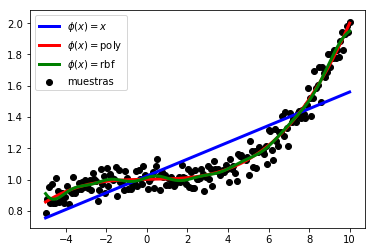

In [38]:
#%% your code
# Radial-basis function kernel (aka squared-exponential kernel).
from sklearn.gaussian_process.kernels import RBF

rbf = RBF()
# [:,None] represent transpose
# Quantity of data are centroids
mu=np.linspace(x.min(),x.max(),15)[:,None]

Phi=rbf(x, mu)

# create matrix with ones, shape size of 'x' training data
unos = np.ones(x.shape) #Add a variable of ones for the bias

# Concatenate matrix of ones with Phi RBF
Phi=np.concatenate((unos, Phi), axis=1)

## Using 't' target data from before cell - system 2
reg=LinearRegression().fit(Phi, t)

# Regression coef first value are 0 with w_0
#print(reg.coef_)

y_rbf = reg.predict(Phi)

# w0 presents value 0 on this valles model
print('X:',x.shape,'mu:',mu.shape,'Phi:',Phi.shape)

plt.scatter(x, t,  color='black')
plt.plot(x, y_lineal, color='blue', linewidth=3)
plt.plot(x, y_poly, color='red', linewidth=3)
plt.plot(x, y_rbf, color='green', linewidth=3)
plt.legend(('$\phi(x)=x$','$\phi(x)=$poly','$\phi(x)=$rbf','muestras'))
plt.show()

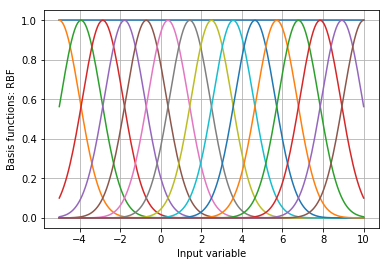

In [39]:
plt.plot(x, Phi)
plt.xlabel('Input variable')
plt.ylabel('Basis functions: RBF')
plt.grid()
plt.show()

**G.** En el siguiente bloque se crean los datos del sistema3. Deben de aplicar una regresión lineal usando bases polinomiales, usen $M\in\{1,5,10,15,20,25\}$. Entranen los diferentes modelos con las variables $x$ y $y$, y estimen las salidas para X_test y guarden esta como $t$_$test$, para cada caso viasualicen el modelo estimado, el modelo real y las muestras utilizadas para el entrenamiento. ¿Qué podemos decir a medida que M crece?. Entre mayor número de bases, ¿mejora la regresión?. Investiga sobre este fenomeno.
¿Existe una forma de solucionarlo? ¿Cómo?.



(10, 1) (10, 1)
Number of samples: 10


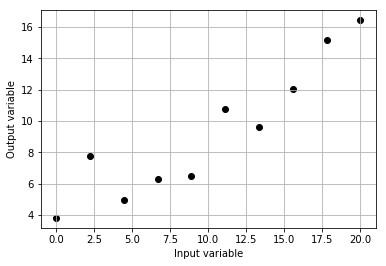

In [40]:
N = 10 # número de muestras a generar
x_init = 0
x_end = 20
x = np.linspace(x_init,x_end,N)[:,None] #datos de entrada, me genera un vector de números de tamaño de N con valores consecutivos entre x_init y x_end

t,y_real = sistema3(x,sigma=1)
print(x.shape,t.shape)
print('Number of samples:',t.shape[0])

plt.scatter(x, t,  color='black')
plt.xlabel('Input variable')
plt.ylabel('Output variable')
plt.grid(True)
plt.show()

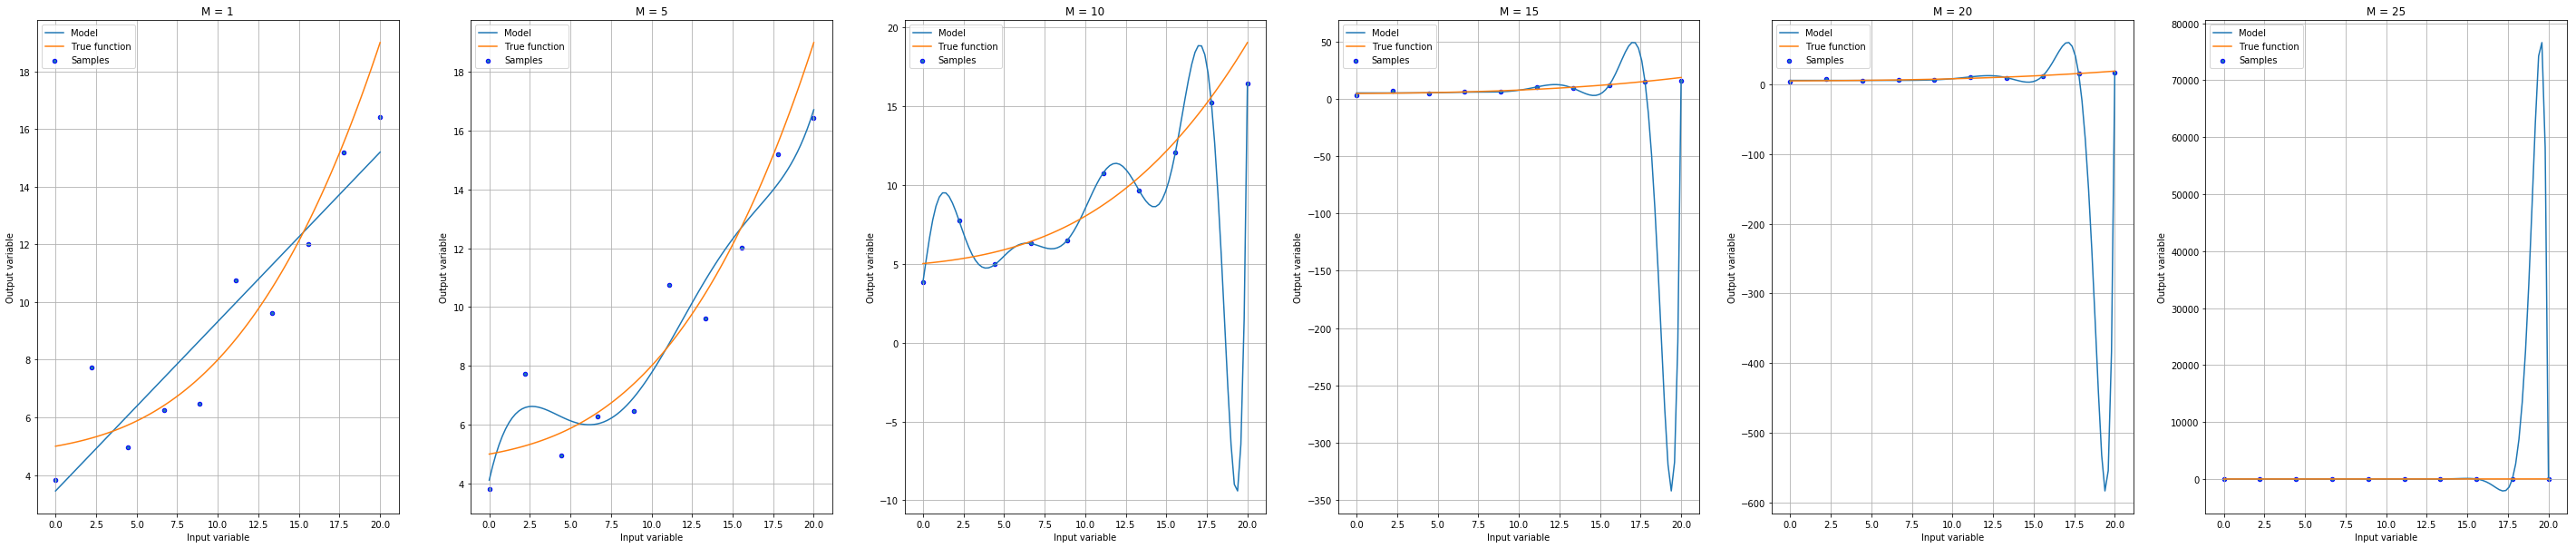

In [41]:

degrees = [1, 5, 10, 15, 20, 25]


X_test = np.linspace(x_init, x_end, 100)[:,None]
t_1,y_real = sistema3(X_test,sigma=1)
plt.figure(figsize=(50, 10))
for enum, degree in enumerate(degrees):
    ax = plt.subplot(1, len(degrees), enum + 1)
    #%% Your code
    # Get Phi for traning data with Polynomial features
    Phi = PolynomialFeatures(degree=degree).fit_transform(x)

    
    
    # create matrix with ones, shape size of 'x' training data
    unos = np.ones(x.shape) #Add a variable of ones for the bias

    # Concatenate matrix of ones with Phi RBF
    Phi=np.concatenate((unos, Phi), axis=1)
    
    ## Using 't' target data from before cell - system 3 but from last 'x' data (t_1 are obtained with X_test)
    # Using Phi how Training data on LinearRegression
    reg= LinearRegression().fit(Phi, t)
    
    
    # Calculate stimate output
    Phi_test = PolynomialFeatures(degree=degree).fit_transform(X_test)
    
    # create matrix with ones, shape size of 'x' training data
    unos = np.ones(X_test.shape) #Add a variable of ones for the bias

    # Concatenate matrix of ones with Phi RBF
    Phi_test=np.concatenate((unos, Phi_test), axis=1)
    
    t_test = reg.predict(Phi_test)



    #%%
    plt.plot(X_test, t_test, label="Model")
    plt.plot(X_test, y_real, label="True function")
    plt.scatter(x, t, edgecolor='b', s=20, label="Samples")
    plt.legend(loc="best")
    plt.title("M = {}".format(degrees[enum]))
    plt.xlabel('Input variable')
    plt.ylabel('Output variable')
    plt.grid(True)
plt.show()



# Probando el sistema 3 con RBF

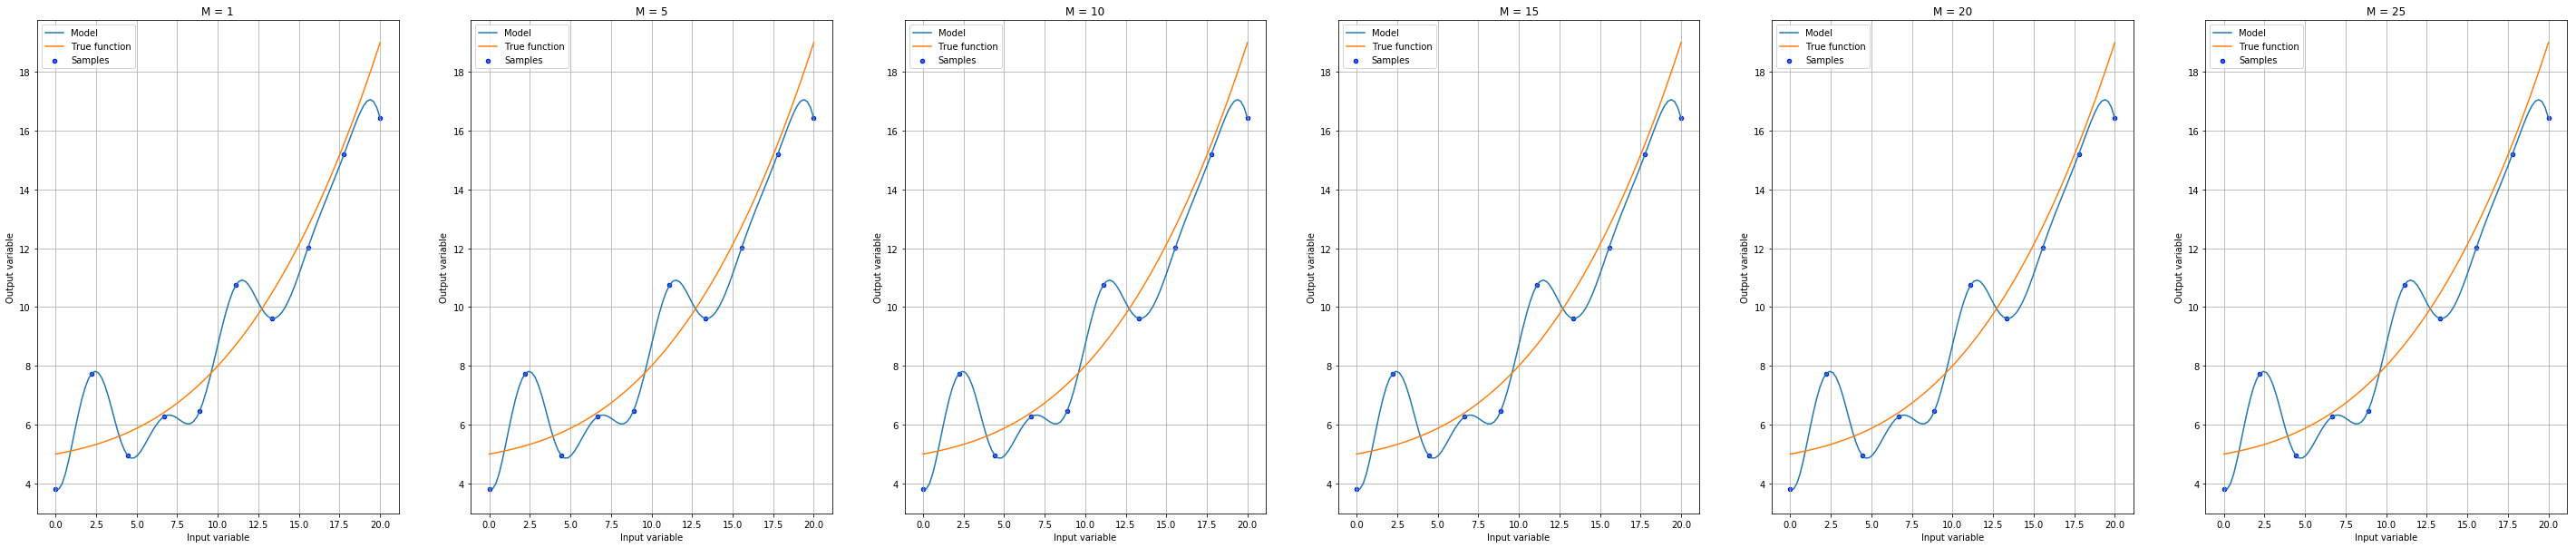

In [42]:
# Test to predict system 3 with RBF
degrees = [1, 5, 10, 15, 20, 25]


X_test = np.linspace(x_init, x_end, 100)[:,None]
t_1,y_real = sistema3(X_test,sigma=1)
plt.figure(figsize=(50, 10))
for enum, degree in enumerate(degrees):
    ax = plt.subplot(1, len(degrees), enum + 1)
    #%% Your code

    ## Using 't' target data from before cell - system 2
    
    # Create RBF objetct
    rbf = RBF()
    
    # [:,None] represent transpose
    # Quantity of data are centroids
    mu=np.linspace(x.min(),x.max(),degree)[:,None]

    # Get Phi training Data with RBF
    Phi=rbf(x, mu)

    # create matrix with ones, shape size of 'x' training data
    unos = np.ones(x.shape) #Add a variable of ones for the bias

    # Concatenate matrix of ones with Phi RBF
    Phi=np.concatenate((unos, Phi), axis=1)
    
    ## Using 't' target data from before cell - system 3 but from last 'x' data (t_1 are obtained with X_test)
    # Using Phi how Training data on LinearRegression
    reg= LinearRegression().fit(Phi, t)
    
    

    # Calculate stimate output
    # [:,None] represent transpose
    # Quantity of data are centroids
    mu=np.linspace(X_test.min(),X_test.max(),degree)[:,None]
    
    # Get Phi training Data with RBF
    Phi_test=rbf(X_test, mu)
    
    # create matrix with ones, shape size of 'X_test' training data
    unos = np.ones(X_test.shape) #Add a variable of ones for the bias

    # Concatenate matrix of ones with Phi RBF
    Phi_test=np.concatenate((unos, Phi_test), axis=1)
    
    t_test = reg.predict(Phi_test)



    #%%
    plt.plot(X_test, t_test, label="Model")
    plt.plot(X_test, y_real, label="True function")
    plt.scatter(x, t, edgecolor='b', s=20, label="Samples")
    plt.legend(loc="best")
    plt.title("M = {}".format(degrees[enum]))
    plt.xlabel('Input variable')
    plt.ylabel('Output variable')
    plt.grid(True)
plt.show()



**H.** Realizar de nuevo el inciso anterior pero utilizando una regularización de Lasso y Ridge. ¿Qué diferencia hay con los resultados anteriores? ¿Cómo afecta el parámetro de regularización el resultado de la regresión? 

# Con regression Lasso y caracteristicas polinomiales

number of iterations 2
number of iterations 10000
number of iterations 10000
number of iterations 10000
number of iterations 10000
number of iterations 10000


C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.868626827781116, tolerance: 0.016387869147784482
  positive)
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.127237493228088, tolerance: 0.016387869147784482
  positive)
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.856267814962463, tolerance: 0.016387869147784482
  positive)
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.755535238174332, tolerance: 0.0163878

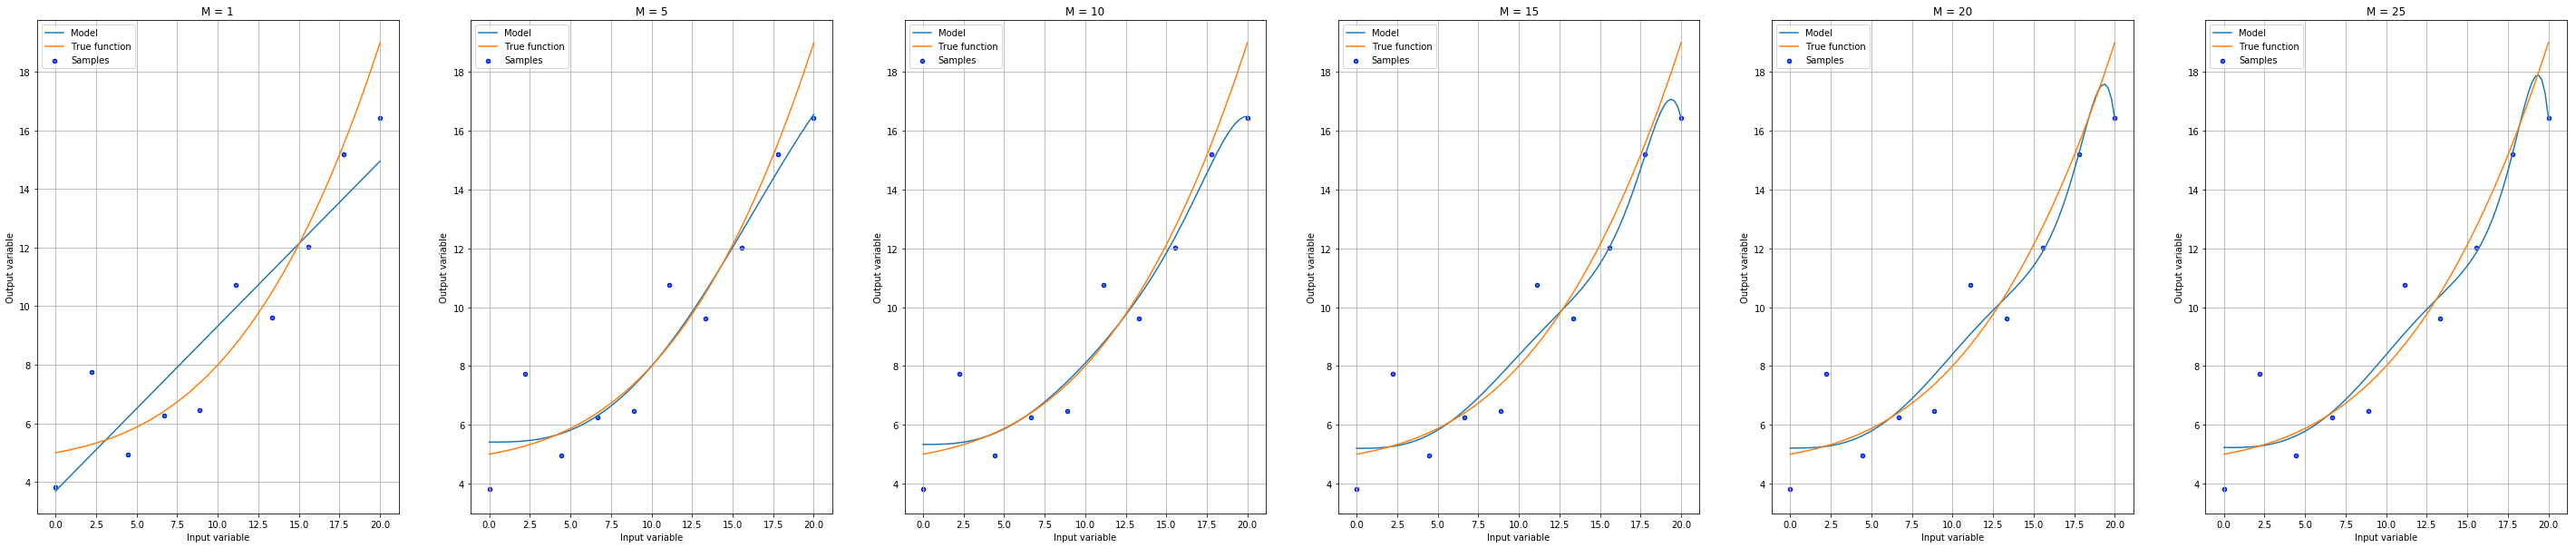

In [43]:
# Import Lasso regression
from sklearn.linear_model import Lasso

degrees = [1, 5, 10, 15, 20, 25]


X_test = np.linspace(x_init, x_end, 100)[:,None]
t_1,y_real = sistema3(X_test,sigma=1)
plt.figure(figsize=(50, 10))
for enum, degree in enumerate(degrees):
    ax = plt.subplot(1, len(degrees), enum + 1)
    #%% Your code
    # Get Phi for traning data with Polynomial features
    Phi = PolynomialFeatures(degree=degree).fit_transform(x)
    
    # create matrix with ones, shape size of 'x' training data
    unos = np.ones(x.shape) #Add a variable of ones for the bias
    
    # Concatenate matrix of ones with Phi RBF
    Phi=np.concatenate((unos, Phi), axis=1)
    
    ## Using 't' target data from before cell - system 3 but from last 'x' data (t_1 are obtained with X_test)
    
    # (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
    # Using Phi how Training data on Lasso regression
    reg= Lasso(alpha=1, max_iter=10000).fit(Phi, t)
    
    # More GAP more different (distance of breach)
    print("number of iterations", reg.n_iter_)
    
    
    Phi_test = PolynomialFeatures(degree=degree).fit_transform(X_test)
    
    # create matrix with ones, shape size of 'X_test' training data
    unos = np.ones(X_test.shape) #Add a variable of ones for the bias

    # Concatenate matrix of ones with Phi
    Phi_test=np.concatenate((unos, Phi_test), axis=1)
    
    
    t_test = reg.predict(Phi_test)



    #%%
    plt.plot(X_test, t_test, label="Model")
    plt.plot(X_test, y_real, label="True function")
    plt.scatter(x, t, edgecolor='b', s=20, label="Samples")
    plt.legend(loc="best")
    plt.title("M = {}".format(degrees[enum]))
    plt.xlabel('Input variable')
    plt.ylabel('Output variable')
    plt.grid(True)
plt.show()



# Con regression Lasso y RBF

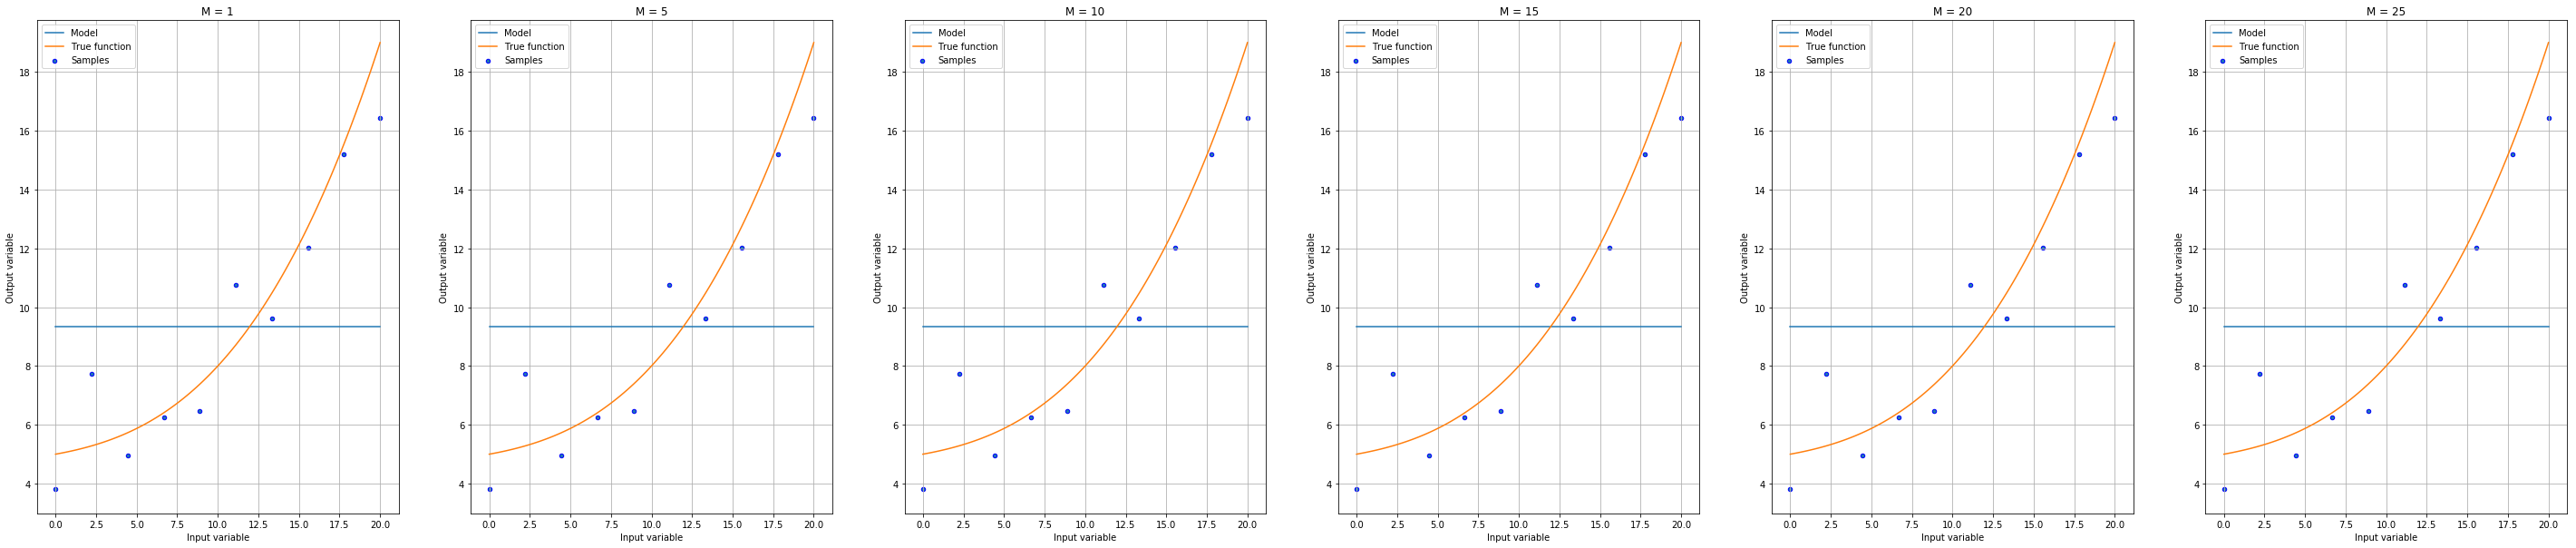

In [44]:
# Import Ridge regression
from sklearn.linear_model import Lasso

degrees = [1, 5, 10, 15, 20, 25]


X_test = np.linspace(x_init, x_end, 100)[:,None]
t_1,y_real = sistema3(X_test,sigma=1)
plt.figure(figsize=(50, 10))
for enum, degree in enumerate(degrees):
    ax = plt.subplot(1, len(degrees), enum + 1)
    #%% Your code
    # [:,None] represent transpose
    # Quantity of data are centroids
    mu=np.linspace(x.min(),x.max(),degree)[:,None]
    
    # Get Phi training Data with RBF
    Phi=rbf(x, mu)
    
    # create matrix with ones, shape size of 'x' training data
    unos = np.ones(x.shape) #Add a variable of ones for the bias
    
    # Concatenate matrix of ones with Phi RBF
    Phi=np.concatenate((unos, Phi), axis=1)
    
    ## Using 't' target data from before cell - system 3 but from last 'x' data (t_1 are obtained with X_test)
    
    # (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
    # Using Phi how Training data on Lasso regression
    reg= Lasso(alpha=1).fit(Phi, t)
    
    # [:,None] represent transpose
    # Quantity of data are centroids
    mu=np.linspace(X_test.min(),X_test.max(),degree)[:,None]
    
    # Get Phi_test training Data with RBF
    Phi_test=rbf(X_test, mu)
    
    # create matrix with ones, shape size of 'X_test' training data
    unos = np.ones(X_test.shape) #Add a variable of ones for the bias

    # Concatenate matrix of ones with Phi
    Phi_test=np.concatenate((unos, Phi_test), axis=1)
    
    
    t_test = reg.predict(Phi_test)



    #%%
    plt.plot(X_test, t_test, label="Model")
    plt.plot(X_test, y_real, label="True function")
    plt.scatter(x, t, edgecolor='b', s=20, label="Samples")
    plt.legend(loc="best")
    plt.title("M = {}".format(degrees[enum]))
    plt.xlabel('Input variable')
    plt.ylabel('Output variable')
    plt.grid(True)
plt.show()



# Con regression Ridge y caracteristicas polinomiales

C:\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


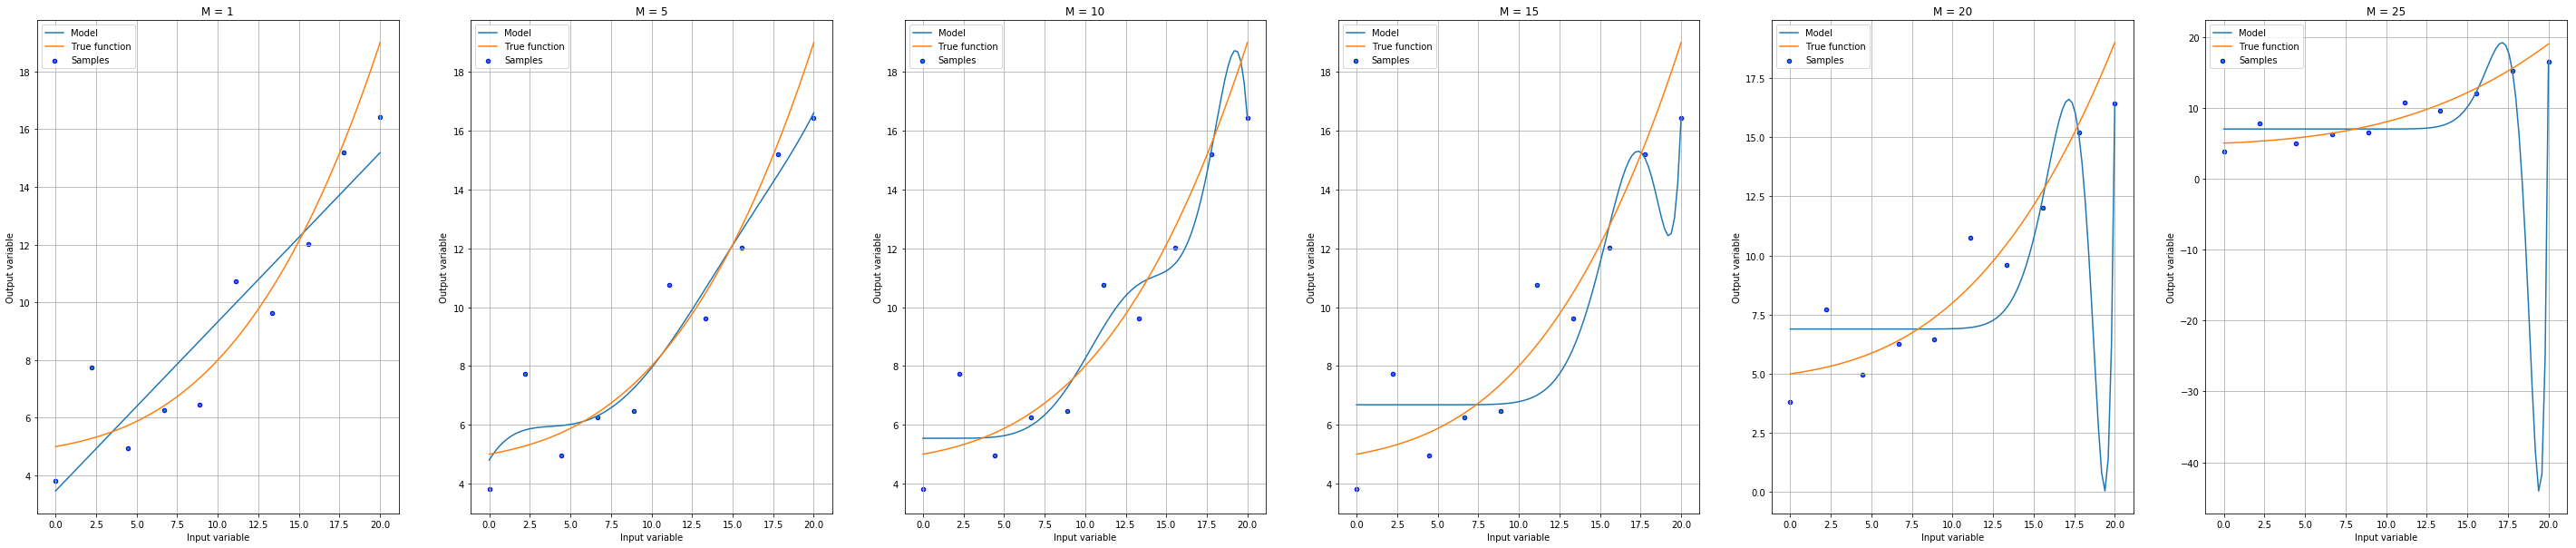

In [45]:
# Import Ridge regression
from sklearn.linear_model import Ridge

degrees = [1, 5, 10, 15, 20, 25]


X_test = np.linspace(x_init, x_end, 100)[:,None]
t_1,y_real = sistema3(X_test,sigma=1)
plt.figure(figsize=(50, 10))
for enum, degree in enumerate(degrees):
    ax = plt.subplot(1, len(degrees), enum + 1)
    #%% Your code
    # Get Phi for traning data with Polynomial features
    Phi = PolynomialFeatures(degree=degree).fit_transform(x)
    
    # create matrix with ones, shape size of 'x' training data
    unos = np.ones(x.shape) #Add a variable of ones for the bias
    
    # Concatenate matrix of ones with Phi RBF
    Phi=np.concatenate((unos, Phi), axis=1)
    
    ## Using 't' target data from before cell - system 3 but from last 'x' data (t_1 are obtained with X_test)
    
    # (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
    # Using Phi how Training data on Lasso regression
    reg= Ridge(alpha=1).fit(Phi, t)
    
    Phi_test = PolynomialFeatures(degree=degree).fit_transform(X_test)
    
    # create matrix with ones, shape size of 'X_test' training data
    unos = np.ones(X_test.shape) #Add a variable of ones for the bias

    # Concatenate matrix of ones with Phi RBF
    Phi_test=np.concatenate((unos, Phi_test), axis=1)
    
    
    t_test = reg.predict(Phi_test)



    #%%
    plt.plot(X_test, t_test, label="Model")
    plt.plot(X_test, y_real, label="True function")
    plt.scatter(x, t, edgecolor='b', s=20, label="Samples")
    plt.legend(loc="best")
    plt.title("M = {}".format(degrees[enum]))
    plt.xlabel('Input variable')
    plt.ylabel('Output variable')
    plt.grid(True)
plt.show()



# Con regression Ridge y RBF

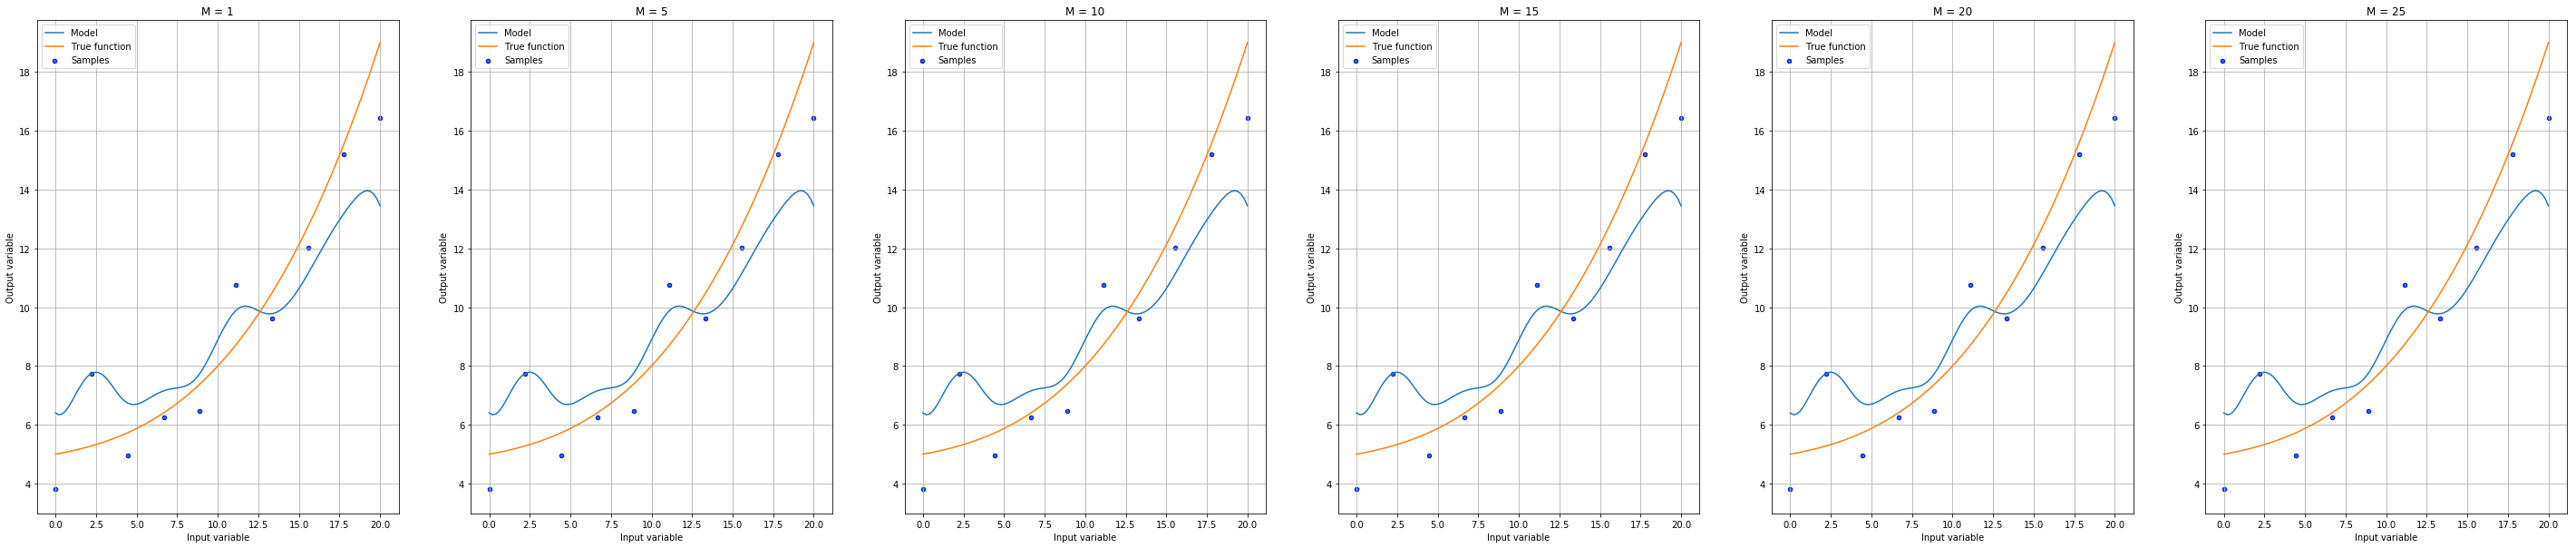

In [46]:
# Import Ridge regression
from sklearn.linear_model import Ridge

degrees = [1, 5, 10, 15, 20, 25]


X_test = np.linspace(x_init, x_end, 100)[:,None]
t_1,y_real = sistema3(X_test,sigma=1)
plt.figure(figsize=(50, 10))
for enum, degree in enumerate(degrees):
    ax = plt.subplot(1, len(degrees), enum + 1)
    #%% Your code
    # [:,None] represent transpose
    # Quantity of data are centroids
    mu=np.linspace(x.min(),x.max(),degree)[:,None]
    
    # Get Phi training Data with RBF
    Phi=rbf(x, mu)
    
    # create matrix with ones, shape size of 'x' training data
    unos = np.ones(x.shape) #Add a variable of ones for the bias
    
    # Concatenate matrix of ones with Phi RBF
    Phi=np.concatenate((unos, Phi), axis=1)
    
    ## Using 't' target data from before cell - system 3 but from last 'x' data (t_1 are obtained with X_test)
    
    # (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
    # Using Phi how Training data on Lasso regression
    reg= Ridge(alpha=1).fit(Phi, t)
    
    # [:,None] represent transpose
    # Quantity of data are centroids
    mu=np.linspace(X_test.min(),X_test.max(),degree)[:,None]
    
    # Get Phi training Data with RBF
    Phi_test=rbf(X_test, mu)
    
    # create matrix with ones, shape size of 'X_test' training data
    unos = np.ones(X_test.shape) #Add a variable of ones for the bias

    # Concatenate matrix of ones with Phi
    Phi_test=np.concatenate((unos, Phi_test), axis=1)
    
    
    t_test = reg.predict(Phi_test)



    #%%
    plt.plot(X_test, t_test, label="Model")
    plt.plot(X_test, y_real, label="True function")
    plt.scatter(x, t, edgecolor='b', s=20, label="Samples")
    plt.legend(loc="best")
    plt.title("M = {}".format(degrees[enum]))
    plt.xlabel('Input variable')
    plt.ylabel('Output variable')
    plt.grid(True)
plt.show()



In [47]:
#

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.538644500927495, tolerance: 0.016387869147784482
  positive)
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.150500860226138, tolerance: 0.016387869147784482
  positive)
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.821874940865307, tolerance: 0.016387869147784482
  positive)
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.73294664041328, tolerance: 0.01638786

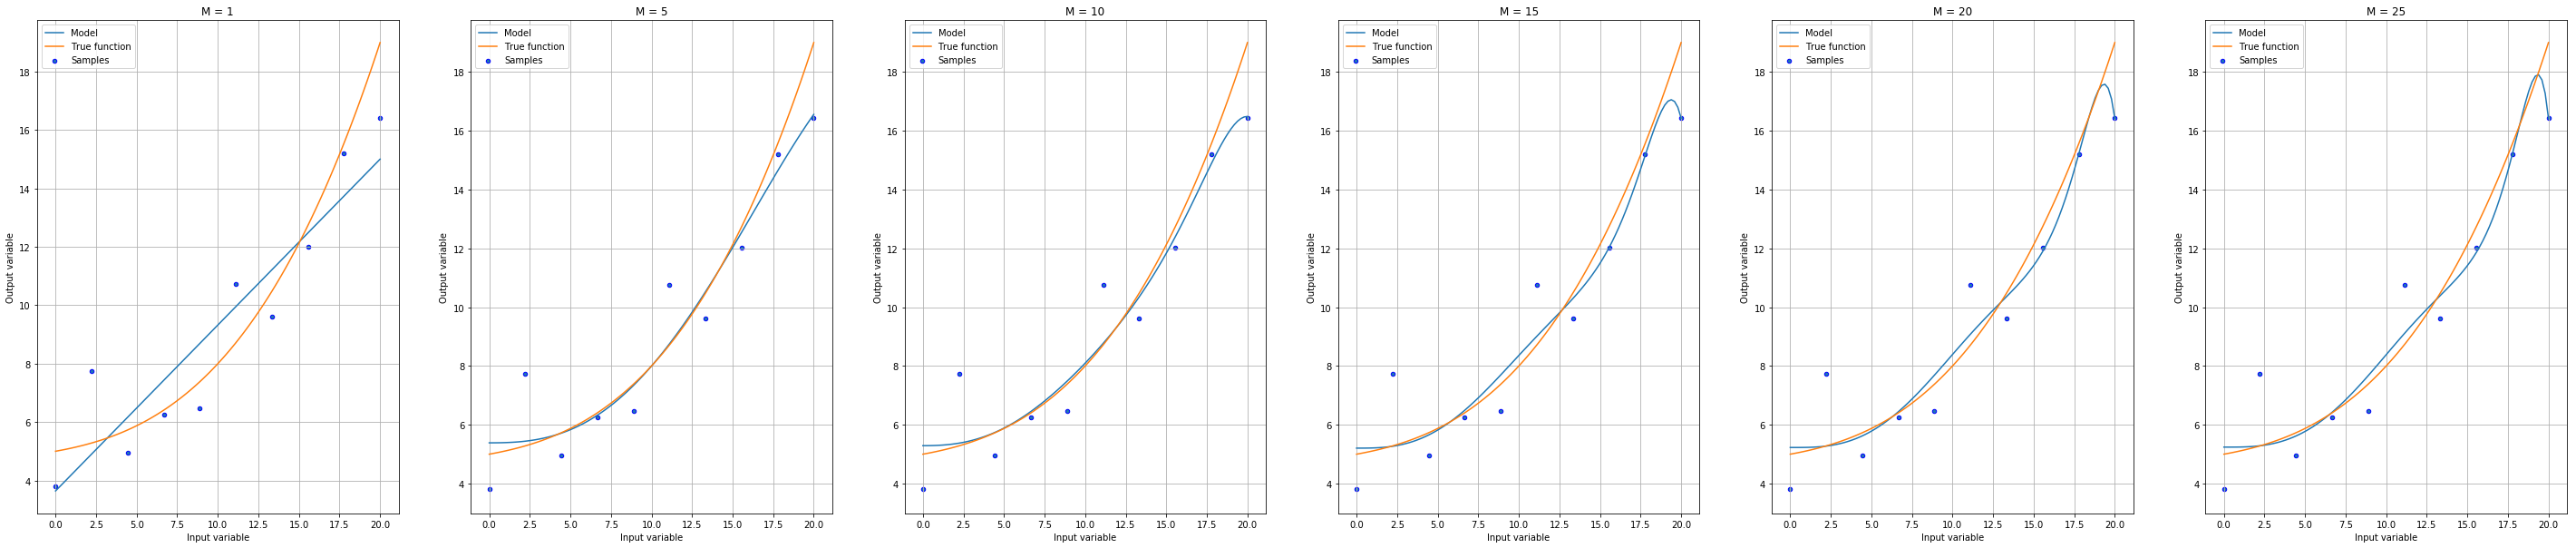

In [48]:
# Import Ridge regression
from sklearn.linear_model import ElasticNet

degrees = [1, 5, 10, 15, 20, 25]


X_test = np.linspace(x_init, x_end, 100)[:,None]
t_1,y_real = sistema3(X_test,sigma=1)
plt.figure(figsize=(50, 10))
for enum, degree in enumerate(degrees):
    ax = plt.subplot(1, len(degrees), enum + 1)
    #%% Your code
    # Get Phi for traning data with Polynomial features
    Phi = PolynomialFeatures(degree=degree).fit_transform(x)
    
    # create matrix with ones, shape size of 'x' training data
    unos = np.ones(x.shape) #Add a variable of ones for the bias
    
    # Concatenate matrix of ones with Phi RBF
    Phi=np.concatenate((unos, Phi), axis=1)
    
    ## Using 't' target data from before cell - system 3 but from last 'x' data (t_1 are obtained with X_test)
    
    # (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
    # Using Phi how Training data on Lasso regression
    reg= ElasticNet(alpha=1, max_iter=10000).fit(Phi, t)
    
    Phi_test = PolynomialFeatures(degree=degree).fit_transform(X_test)
    
    # create matrix with ones, shape size of 'X_test' training data
    unos = np.ones(X_test.shape) #Add a variable of ones for the bias

    # Concatenate matrix of ones with Phi RBF
    Phi_test=np.concatenate((unos, Phi_test), axis=1)
    
    
    t_test = reg.predict(Phi_test)



    #%%
    plt.plot(X_test, t_test, label="Model")
    plt.plot(X_test, y_real, label="True function")
    plt.scatter(x, t, edgecolor='b', s=20, label="Samples")
    plt.legend(loc="best")
    plt.title("M = {}".format(degrees[enum]))
    plt.xlabel('Input variable')
    plt.ylabel('Output variable')
    plt.grid(True)
plt.show()



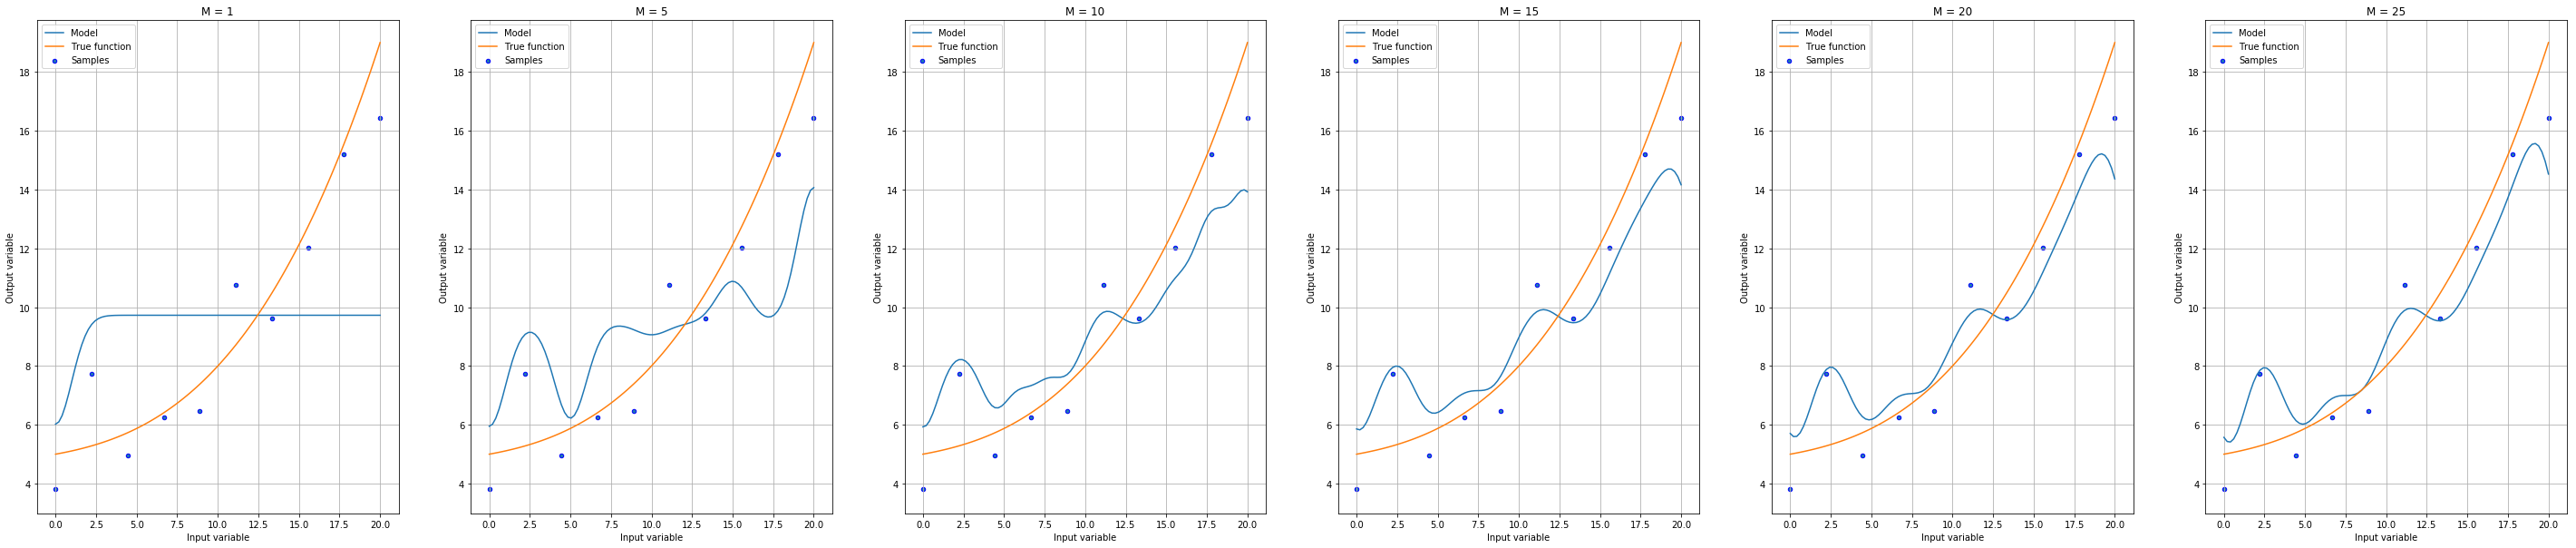

In [49]:
# Import Ridge regression
from sklearn.linear_model import ElasticNet

degrees = [1, 5, 10, 15, 20, 25]


X_test = np.linspace(x_init, x_end, 100)[:,None]
t_1,y_real = sistema3(X_test,sigma=1)
plt.figure(figsize=(50, 10))
for enum, degree in enumerate(degrees):
    ax = plt.subplot(1, len(degrees), enum + 1)
    #%% Your code
    # [:,None] represent transpose
    # Quantity of data are centroids
    mu=np.linspace(x.min(),x.max(),degree)[:,None]
    
    # Get Phi training Data with RBF
    Phi=rbf(x, mu)
    
    # create matrix with ones, shape size of 'x' training data
    unos = np.ones(x.shape) #Add a variable of ones for the bias
    
    # Concatenate matrix of ones with Phi RBF
    Phi=np.concatenate((unos, Phi), axis=1)
    
    ## Using 't' target data from before cell - system 3 but from last 'x' data (t_1 are obtained with X_test)
    
    # (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
    # Using Phi how Training data on Lasso regression
    reg= ElasticNet(alpha=0.1).fit(Phi, t)
    
    # [:,None] represent transpose
    # Quantity of data are centroids
    mu=np.linspace(X_test.min(),X_test.max(),degree)[:,None]
    
    # Get Phi training Data with RBF
    Phi_test=rbf(X_test, mu)
    
    # create matrix with ones, shape size of 'X_test' training data
    unos = np.ones(X_test.shape) #Add a variable of ones for the bias

    # Concatenate matrix of ones with Phi
    Phi_test=np.concatenate((unos, Phi_test), axis=1)
    
    
    t_test = reg.predict(Phi_test)



    #%%
    plt.plot(X_test, t_test, label="Model")
    plt.plot(X_test, y_real, label="True function")
    plt.scatter(x, t, edgecolor='b', s=20, label="Samples")
    plt.legend(loc="best")
    plt.title("M = {}".format(degrees[enum]))
    plt.xlabel('Input variable')
    plt.ylabel('Output variable')
    plt.grid(True)
plt.show()



# Analizando un data set de interes
Este proceso es para realizar una de las actividades que se indica en el PDF que es escojer una base de datos de su interes y escojer una variable objetivo y aplciarle regresión lineal para predecirla

1594    10.5
1595    11.2
1596    11.0
1597    10.2
1598    11.0
Name: alcohol, dtype: float64
Shape for x (799, 1)
Shape for x_topredict (799, 1)
Shape for t (799, 1)
(799, 3)
(799, 1)
Cross validation for 0
fit_time:  [0.00098705 0.00098801 0.         0.         0.        ]
score_time:  [0.         0.         0.00099683 0.0009973  0.        ]
test_score:  [-0.10860583 -0.12529806 -0.19661555 -0.0563521  -0.07655587]
(799, 4)
(799, 1)
Cross validation for 1
fit_time:  [0.         0.         0.         0.         0.00099707]
score_time:  [0.0009973  0.00099754 0.         0.         0.        ]
test_score:  [-0.11071224 -0.12883886 -0.1970009  -0.0598727  -0.07975397]
(799, 5)
(799, 1)
Cross validation for 2
fit_time:  [0.00099659 0.         0.         0.         0.        ]
score_time:  [0.         0.00099707 0.0009973  0.         0.        ]
test_score:  [-0.11176273 -0.14580823 -0.19670066 -0.05884605 -0.07910356]
(799, 6)
(799, 1)
Cross validation for 3
fit_time:  [0.00096178 0.0009

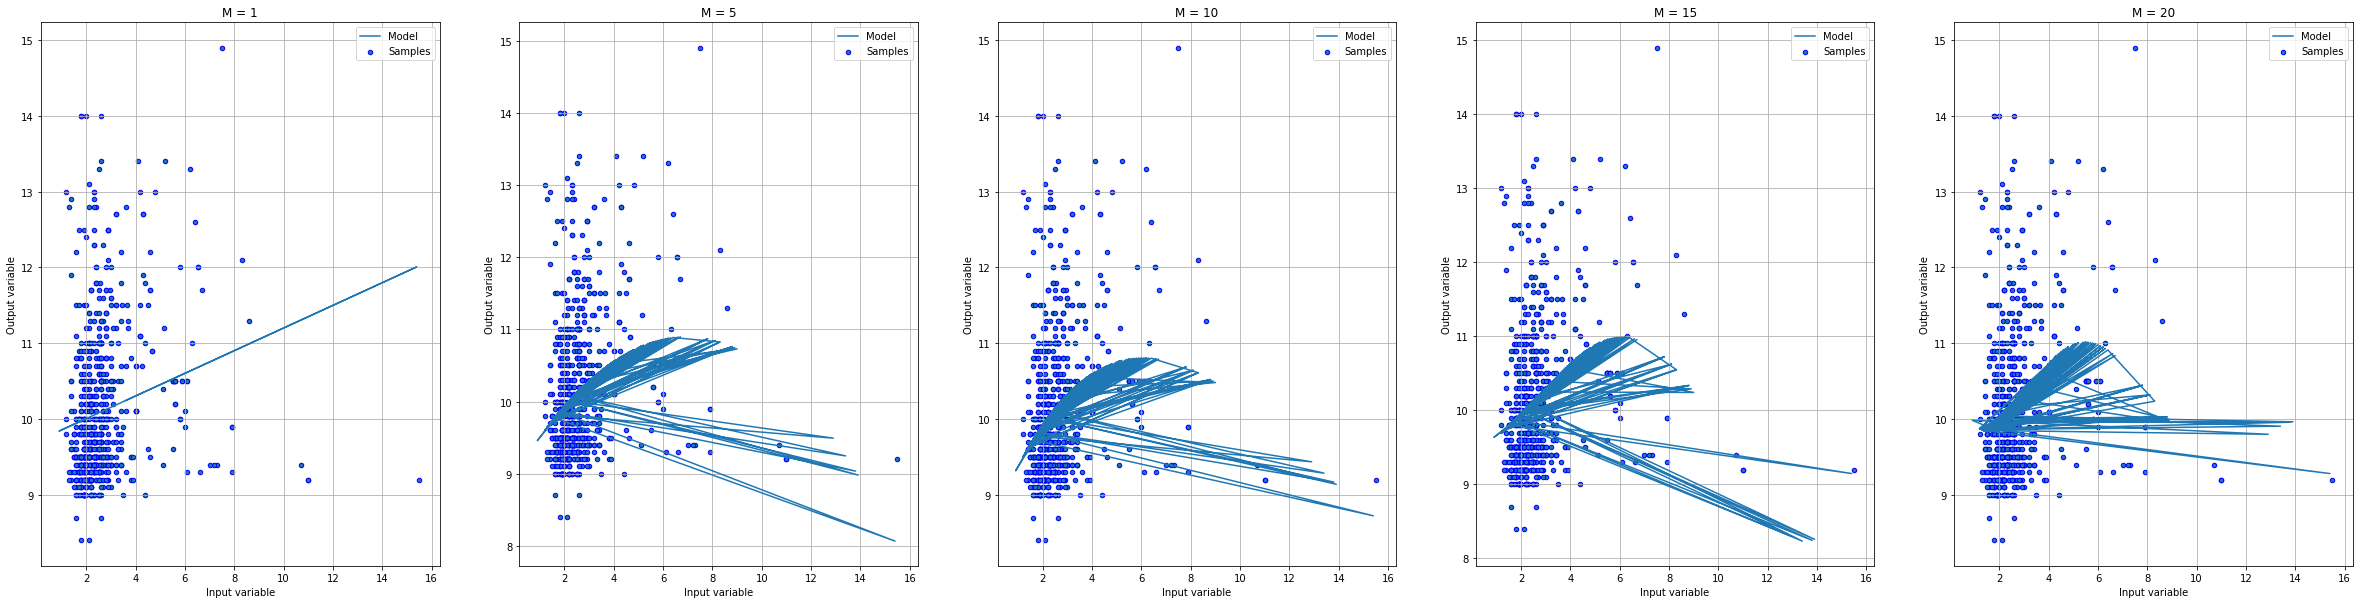

In [63]:
# Import pandas for dataset management
import pandas as pd

# import cross validation
from sklearn.model_selection import cross_validate

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

# Replace All space in column headers
data.rename(columns=lambda name: name.replace(" ", "_"), inplace=True)
    
# get column headers such as [keyX1, keyX2, keyX3, ..., keyY]
# keyList=data.columns.values[int(sys.argv[2]):]
keyList=data.columns.values

# Show head and tal data of column V1
print(data["alcohol"].tail())


## Var x
# Get first half data from dataframe
first_half_df=data.iloc[0:int(len(data["residual_sugar"])/2)]


# Convert var residual sugar from dataframe and use how 'x' training data to numpy array and reshape
x=first_half_df["residual_sugar"].to_numpy().reshape(-1,1)
print("Shape for x {}".format(x.shape))


## Var x_topredict
# Get second half data from var residual sugar from dataset and use how 'x_topredict'
second_half_df=data.iloc[int(len(data["residual_sugar"])/2):len(data["residual_sugar"])-1]

# Convert pandas dataframe to numpy array and reshape
x_topredict=second_half_df["residual_sugar"].to_numpy().reshape(-1,1)
print("Shape for x_topredict {}".format(x_topredict.shape))

## Var t
## Get first half data from var alcohol from datase and use how 't' target data
t=first_half_df["alcohol"].to_numpy().reshape(-1,1)
print("Shape for t {}".format(t.shape))


plt.figure(figsize=(50, 10))
for enum, degree in enumerate([1,2,3,4,5]):
    ax = plt.subplot(1, len(degrees), enum + 1)
    # Get Phi for traning data with Polynomial features
    Phi = PolynomialFeatures(degree=degree).fit_transform(x)
    
    # Quantity of data are centroids
    mu=np.linspace(x.min(),x.max(),degree)[:,None]
    
    # Get Phi training Data with RBF
    #Phi=rbf(x, mu)
    
    # create matrix with ones, shape size of 'x' training data
    unos = np.ones(x.shape) #Add a variable of ones for the bias
    
    # Concatenate matrix of ones with Phi RBF
    Phi=np.concatenate((unos, Phi), axis=1)
    
    ## Using 't' target data from before cell - system 3 but from last 'x' data (t_1 are obtained with X_test)
    
    
    # Using Phi how Training data on LinearRegression
    reg= LinearRegression().fit(Phi, t)
    
    
    
    Phi_test = PolynomialFeatures(degree=degree).fit_transform(x_topredict)
    
    # Quantity of data are centroids
    mu=np.linspace(x_topredict.min(),x_topredict.max(),degree)[:,None]
    
    # Get Phi training Data with RBF
    #Phi_test=rbf(x_topredict, mu)
    
    # create matrix with ones, shape size of 'X_test' training data
    unos = np.ones(x_topredict.shape) #Add a variable of ones for the bias

    # Concatenate matrix of ones with Phi RBF
    Phi_test=np.concatenate((unos, Phi_test), axis=1)
    
    
    t_test = reg.predict(Phi_test)
    print(Phi_test.shape)
    print(t.shape)
    cv_results = cross_validate(reg, Phi_test, t)
    
    print("Cross validation for {}".format(enum))
    print("fit_time: ",cv_results['fit_time'])
    print("score_time: ",cv_results['score_time'])
    print("test_score: ",cv_results['test_score'])



    #%%
    plt.plot(x_topredict, t_test, label="Model")
    #plt.plot(X_test, y_real, label="True function")
    plt.scatter(x, t, edgecolor='b', s=20, label="Samples")
    plt.legend(loc="best")
    plt.title("M = {}".format(degrees[enum]))
    plt.xlabel('Input variable')
    plt.ylabel('Output variable')
    plt.grid(True)
plt.show()
